https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873

In [15]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import folium
import os

In [16]:
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north = 48.0081000, south = 48.0048000,
                        east = 7.8391000, west = 7.8357000, network_type = 'all')                      

C:\Users\Arved\AppData\Local\Temp\ipykernel_7592\882608263.py:2: FutureWarning:

The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.



In [17]:
list(G.edges(data=True))[0]

(31404363,
 31404367,
 {'osmid': 111857038,
  'highway': 'service',
  'service': 'driveway',
  'oneway': False,
  'reversed': False,
  'length': 19.025})

In [18]:
# Create a map
m = folium.Map(location=[48.006, 7.837], zoom_start=10,
               zoom_control=False, scrollWheelZoom=False)
# Defining the map boundaries 
m.fit_bounds([[48.0048000, 7.8357000], [48.0081000, 7.8391000]])

In [19]:
# read car icon
car_icon = folium.features.CustomIcon('..\\Images\\Car Icon.jpeg', icon_size=(30, 30))
# include the car icon in the map
folium.Marker([list(G.nodes(data=True))[0][1]['y'],list(G.nodes(data=True))[0][1]['x']], icon=car_icon).add_to(m)

C:\Users\Arved\AppData\Local\Temp\ipykernel_7592\2849202288.py:2: FutureWarning:

The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.




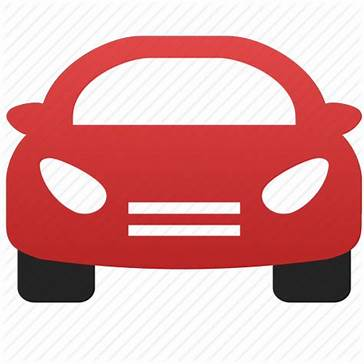

In [20]:
# plot the graph on the map
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')

C:\Users\Arved\AppData\Local\Temp\ipykernel_7592\1832328589.py:4: FutureWarning:

The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

C:\Users\Arved\AppData\Local\Temp\ipykernel_7592\1832328589.py:5: FutureWarning:

The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.




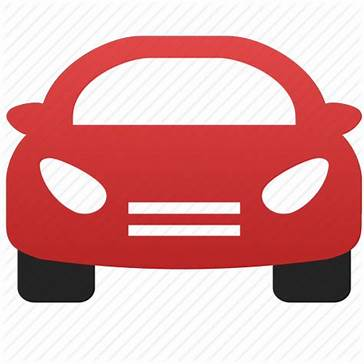

In [21]:
# calculate shortest path
sp = nx.shortest_path(G, list(G.nodes())[0], list(G.nodes())[-1], weight='length')
# plot the shortest path
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', color='gray')
ox.folium.plot_route_folium(G, route=sp, route_map=m, popup_attribute='osmid', color='red')

# Annotations

# Plotly Graph Objects

## V1 Marker Symbol

In [22]:
## mapbox access token
# mapbox_access_token = os.getenv('MAPBOX_TOKEN')

# 50,000 free loads, afterwards it is a paid service

# Initialization
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines+text",
    lon = [],
    lat = []
    ))

# Add edges to the map
for edge in G.edges():
    fig.add_trace(go.Scattermapbox(
        mode = "lines",
        lon = [G.nodes[edge[0]]['x'], G.nodes[edge[1]]['x']],
        lat = [G.nodes[edge[0]]['y'], G.nodes[edge[1]]['y']],
        marker = {'size': 10},
        line = dict(width = 2, color = 'blue'),
        hoverinfo = 'none'
    ))


# Add nodes to the map
for node in G.nodes():
    if node == 31404363:
        fig.add_trace(go.Scattermapbox(
            mode = "markers+text",
            lon = [G.nodes[node]['x']],
            lat = [G.nodes[node]['y']],
            # TODO: Change the symbol of the marker
            marker = go.scattermapbox.Marker(size = 15, symbol='hospital'),
            # marker = go.scattermapbox.Marker(size = 10, 
            #                                  color='orange',
            #                                  symbol='circle'),
            text = [node],
            # textfont = dict(color = 'orange', size = 15),
            textposition = "top center"#,
            #hoverinfo = 'none'
            ))
    else:
        fig.add_trace(go.Scattermapbox(
            mode = "markers",
            lon = [G.nodes[node]['x']],
            lat = [G.nodes[node]['y']],
            marker = {'size': 10, 'color': 'blue'},
            hoverinfo = 'none'
    ))


fig.add_annotation(
    go.layout.Annotation(
        x=G.nodes[31404363]['x'],
        y=G.nodes[31404363]['y'],
        # TODO : Change xref and yref to the coordinates of the map
        xref="x",
        yref="y",
        text='Test',
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
) 
)

# Update the layout
fig.update_layout(
    hovermode = 'closest',
    mapbox = {
        # 'accesstoken': mapbox_access_token,
        'bearing': 0,
        'style': "outdoors", # 'open-street-map'
        'center': {'lon': 7.837, 'lat': 48.006},
        'pitch': 0,
        'zoom': 16},
    showlegend = False,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    height = 800,
    width = 800
    )

# # do not show the axis
# fig.update_xaxes(showticklabels=False)
# fig.update_yaxes(showticklabels=False)

fig.show()

https://github.com/plotly/plotly.py/issues/891

I know this is over two years later, but I had the same issue recently and found my solution. You have the wrong mapbox style selected. The mapbox symbols do not work with the "carto-positron" style or "open-street-map".

In order for symbols to work, you need to use the following mapbox styles (in addition to having a free Mapbox account with a public key):

basic
streets
outdoors
light
dark
satellite
satellite-streets
Reference
https://plotly.com/python/scattermapbox/#set-marker-symbols

## V2 Example Nuclear Waste Sites on Campuses

In [23]:
# # mapbox access token
# mapbox_access_token = os.getenv('MAPBOX_TOKEN')

# 50,000 free calls, afterwards it is a paid service

# Initialization
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines+text",
    lon = [],
    lat = []
    ))

# Add edges to the map
for edge in G.edges():
    fig.add_trace(go.Scattermapbox(
        mode = "lines",
        lon = [G.nodes[edge[0]]['x'], G.nodes[edge[1]]['x']],
        lat = [G.nodes[edge[0]]['y'], G.nodes[edge[1]]['y']],
        marker = {'size': 10},
        line = dict(width = 2, color = 'blue'),
        hoverinfo = 'none'
    ))

# Example Nuclear Waste Sites on Campuses
fig.add_trace(go.Scattermapbox(
        lon = [G.nodes[31404363]['x']],
        lat = [G.nodes[31404363]['y']],
        #mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        )
    ))

fig.add_trace(go.Scattermapbox(
        lon = [G.nodes[31404363]['x']],
        lat = [G.nodes[31404363]['y']],
        #mode='markers',
        marker=go.scattermapbox.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        text='Incident',
        hoverinfo='text'
    ))

fig.add_trace(go.Scattermapbox(
        lon = [G.nodes[31404367]['x']],
        lat = [G.nodes[31404367]['y']],
        #mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(0, 255, 0)',
            opacity=0.7
        )
    ))

fig.add_trace(go.Scattermapbox(
        lon = [G.nodes[31404367]['x']],
        lat = [G.nodes[31404367]['y']],
        #mode='markers',
        marker=go.scattermapbox.Marker(
            size=8,
            color='rgb(177, 242, 172)',
            opacity=0.7
        ),
        text='No Incident',
        hoverinfo='text'
    ))

# Update the layout
fig.update_layout(
    hovermode = 'closest',
    mapbox = {
        # 'accesstoken': mapbox_access_token,
        'bearing': 0,
        'style': "open-street-map",
        'center': {'lon': 7.837, 'lat': 48.006},
        'pitch': 0,
        'zoom': 16},
    showlegend = False,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    height = 800,
    width = 800
    )

fig.show()

In [24]:
# Initialization
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines+text",
    lon = [],
    lat = []
    ))

# Add edges to the map
for edge in G.edges():

    fig.add_trace(go.Scattermapbox(
        mode = "lines",
        lon = [G.nodes[edge[0]]['x'], G.nodes[edge[1]]['x']],
        lat = [G.nodes[edge[0]]['y'], G.nodes[edge[1]]['y']],
        marker = {'size': 10},
        line = dict(width = 2, color = 'blue'),
        hoverinfo = 'none'
    ))


    fig.add_trace(go.Scattermapbox(
            lon = [(G.nodes[edge[0]]['x'] + G.nodes[edge[1]]['x'])/2],
            lat = [(G.nodes[edge[0]]['y'] + G.nodes[edge[1]]['y'])/2],
            marker=go.scattermapbox.Marker(
                size=17,
                color='rgb(255, 0, 0)',
                opacity=0.7
            )
        ))

    fig.add_trace(go.Scattermapbox(
            lon = [(G.nodes[edge[0]]['x'] + G.nodes[edge[1]]['x'])/2],
            lat = [(G.nodes[edge[0]]['y'] + G.nodes[edge[1]]['y'])/2],
            marker=go.scattermapbox.Marker(
                size=8,
                color='rgb(242, 177, 172)',
                opacity=0.7
            ),
            text='Incident',
            hoverinfo='text'
        ))


# Update the layout
fig.update_layout(
    hovermode = 'closest',
    mapbox = {
        # 'accesstoken': mapbox_access_token,
        'bearing': 0,
        'style': "open-street-map",
        'center': {'lon': 7.837, 'lat': 48.006},
        'pitch': 0,
        'zoom': 16},
    showlegend = False,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    height = 800,
    width = 800
    )

fig.show()